<a href="https://colab.research.google.com/github/eliasfrivas/DataScienceII/blob/main/ProyectoParteIII_RivasElias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Proyecto Final: Análisis de la Influencia del Uso de Tecnología en el Nivel de Estrés

**Autor:** Elias Rivas

**Curso:** Machine Learning para la Ciencia de Datos

**Comisión:** 75700
# -------------------------------------------------------------------------

# Análisis de la Influencia del Uso de Tecnología en el Nivel de Estrés

Este proyecto tiene como objetivo analizar la relación entre el uso de dispositivos tecnológicos y los niveles de estrés en las personas, utilizando el dataset `Tech_Use_Stress_Wellness.csv`.

**Hipótesis:**
*   Existe una correlación entre el aumento del tiempo de uso de dispositivos tecnológicos y un mayor nivel de estrés.
*   Ciertos tipos de uso tecnológico (por ejemplo, redes sociales, trabajo) pueden tener una influencia más significativa en el estrés que otros (por ejemplo, entretenimiento, gaming).
*   Factores como la calidad del sueño, la actividad física y el bienestar mental pueden moderar la relación entre el uso de tecnología y el estrés.

**Variable Elegida para Evaluación:**
La variable principal que evaluaremos y buscaremos predecir es `stress_level`.

Exploraremos los datos, construiremos y evaluaremos modelos predictivos para entender cómo diferentes factores, incluyendo el tiempo de pantalla y el uso de diversas tecnologías, se asocian con el estrés y el bienestar general.

# Importar las Librerias

In [147]:
# Suprimir advertencias para mantener limpia la salida del portátil
import warnings
warnings.filterwarnings('ignore')

# Importamos las librerias necesarias
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
import matplotlib.gridspec as gridspec

# Habilitar el trazado en línea para cuadernos Jupyter
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(42)

# Leer los Datos

In [148]:
# Carga de datos y exploración inicial

# Leer el conjunto de datos ubicado en el directorio
df = pd.read_csv('/content/drive/MyDrive/Data Science II/Proyecto Final/Tech_Use_Stress_Wellness.csv', encoding='ascii', delimiter=',')

# Mostrar las primeras filas del conjunto de datos
print('Dataset Shape:', df.shape)
print('Dataset Columns:', df.columns.tolist())
print('\n\n')
df.head(10).T

Dataset Shape: (5000, 25)
Dataset Columns: ['user_id', 'age', 'gender', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'location_type', 'mental_health_score', 'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day']





,0,1,2,3,4,5,6,7,8,9
user_id,1,2,3,4,5,6,7,8,9,10
age,53,66,43,29,57,22,35,53,72,33
gender,Male,Female,Male,Female,Male,Male,Male,Male,Female,Male
daily_screen_time_hours,6.8,4.1,4.7,6.0,6.7,8.6,5.9,7.3,4.2,5.6
phone_usage_hours,2.9,2.1,3.6,4.5,3.4,2.4,4.1,2.5,1.2,2.0
laptop_usage_hours,2.1,1.6,0.0,0.0,2.0,3.4,1.8,2.2,0.5,2.6
tablet_usage_hours,0.5,0.4,0.5,0.2,0.8,1.4,0.0,0.9,1.2,0.3
tv_usage_hours,2.0,0.8,1.4,1.3,1.2,1.1,0.4,2.4,2.3,1.4
social_media_hours,2.3,2.8,3.7,4.5,3.8,4.5,3.8,4.5,0.3,2.6
work_related_hours,3.0,3.5,3.6,4.0,3.5,3.8,3.9,3.8,1.1,3.2


In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,5000.0,2500.50000,1443.520003,1.0,1250.750,2500.50,3750.25,5000.0
age,5000.0,44.70120,17.266880,15.0,30.000,45.00,60.00,74.0
daily_screen_time_hours,5000.0,5.03786,1.835637,1.0,3.700,5.00,6.30,10.0
phone_usage_hours,5000.0,1.99440,0.890671,0.2,1.400,2.00,2.60,5.0
laptop_usage_hours,5000.0,1.55516,1.025994,0.0,0.700,1.50,2.30,5.0
tablet_usage_hours,5000.0,0.66306,0.525438,0.0,0.200,0.60,1.00,2.9
tv_usage_hours,5000.0,1.43304,0.928931,0.0,0.700,1.40,2.10,4.0
social_media_hours,5000.0,3.27692,1.203655,0.3,2.400,3.60,4.50,4.5
work_related_hours,5000.0,3.36024,0.827026,0.7,3.100,3.70,3.90,4.5
entertainment_hours,5000.0,1.66220,0.659647,0.0,1.200,1.60,2.10,3.9


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           5000 non-null   int64  
 1   age                               5000 non-null   int64  
 2   gender                            5000 non-null   object 
 3   daily_screen_time_hours           5000 non-null   float64
 4   phone_usage_hours                 5000 non-null   float64
 5   laptop_usage_hours                5000 non-null   float64
 6   tablet_usage_hours                5000 non-null   float64
 7   tv_usage_hours                    5000 non-null   float64
 8   social_media_hours                5000 non-null   float64
 9   work_related_hours                5000 non-null   float64
 10  entertainment_hours               5000 non-null   float64
 11  gaming_hours                      5000 non-null   float64
 12  sleep_

# Limpieza y preprocesamiento

In [151]:
# Verificar valores nulos
missing_values = df.isnull().sum()
print('Valores faltantes en cada columna:')
print(missing_values[missing_values > 0])

# Descripción general de los tipos de datos
print('\nTipo de Datos:')
print(df.dtypes)

# Convierta columnas booleanas si es necesario (pueden leerse como tipos de objeto)
bool_cols = ['uses_wellness_apps', 'eats_healthy']
for col in bool_cols:
    if df[col].dtype != 'bool':
        df[col] = df[col].astype(bool)

# Si se requiere una limpieza adicional (por ejemplo, tratamiento de valores atípicos), inclúyalo aquí
message = 'La Limpieza de Datos fue Completada...'
border = '*' * (len(message) + 4)
print(f'\n{border}')
print(f'* {message} *')
print(f'{border}')

Valores faltantes en cada columna:
Series([], dtype: int64)

Tipo de Datos:
user_id                               int64
age                                   int64
gender                               object
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours                  float64
tablet_usage_hours                  float64
tv_usage_hours                      float64
social_media_hours                  float64
work_related_hours                  float64
entertainment_hours                 float64
gaming_hours                        float64
sleep_duration_hours                float64
sleep_quality                       float64
mood_rating                         float64
stress_level                          int64
physical_activity_hours_per_week    float64
location_type                        object
mental_health_score                 float64
uses_wellness_apps                     bool
eats_healthy                           bool


# EDA

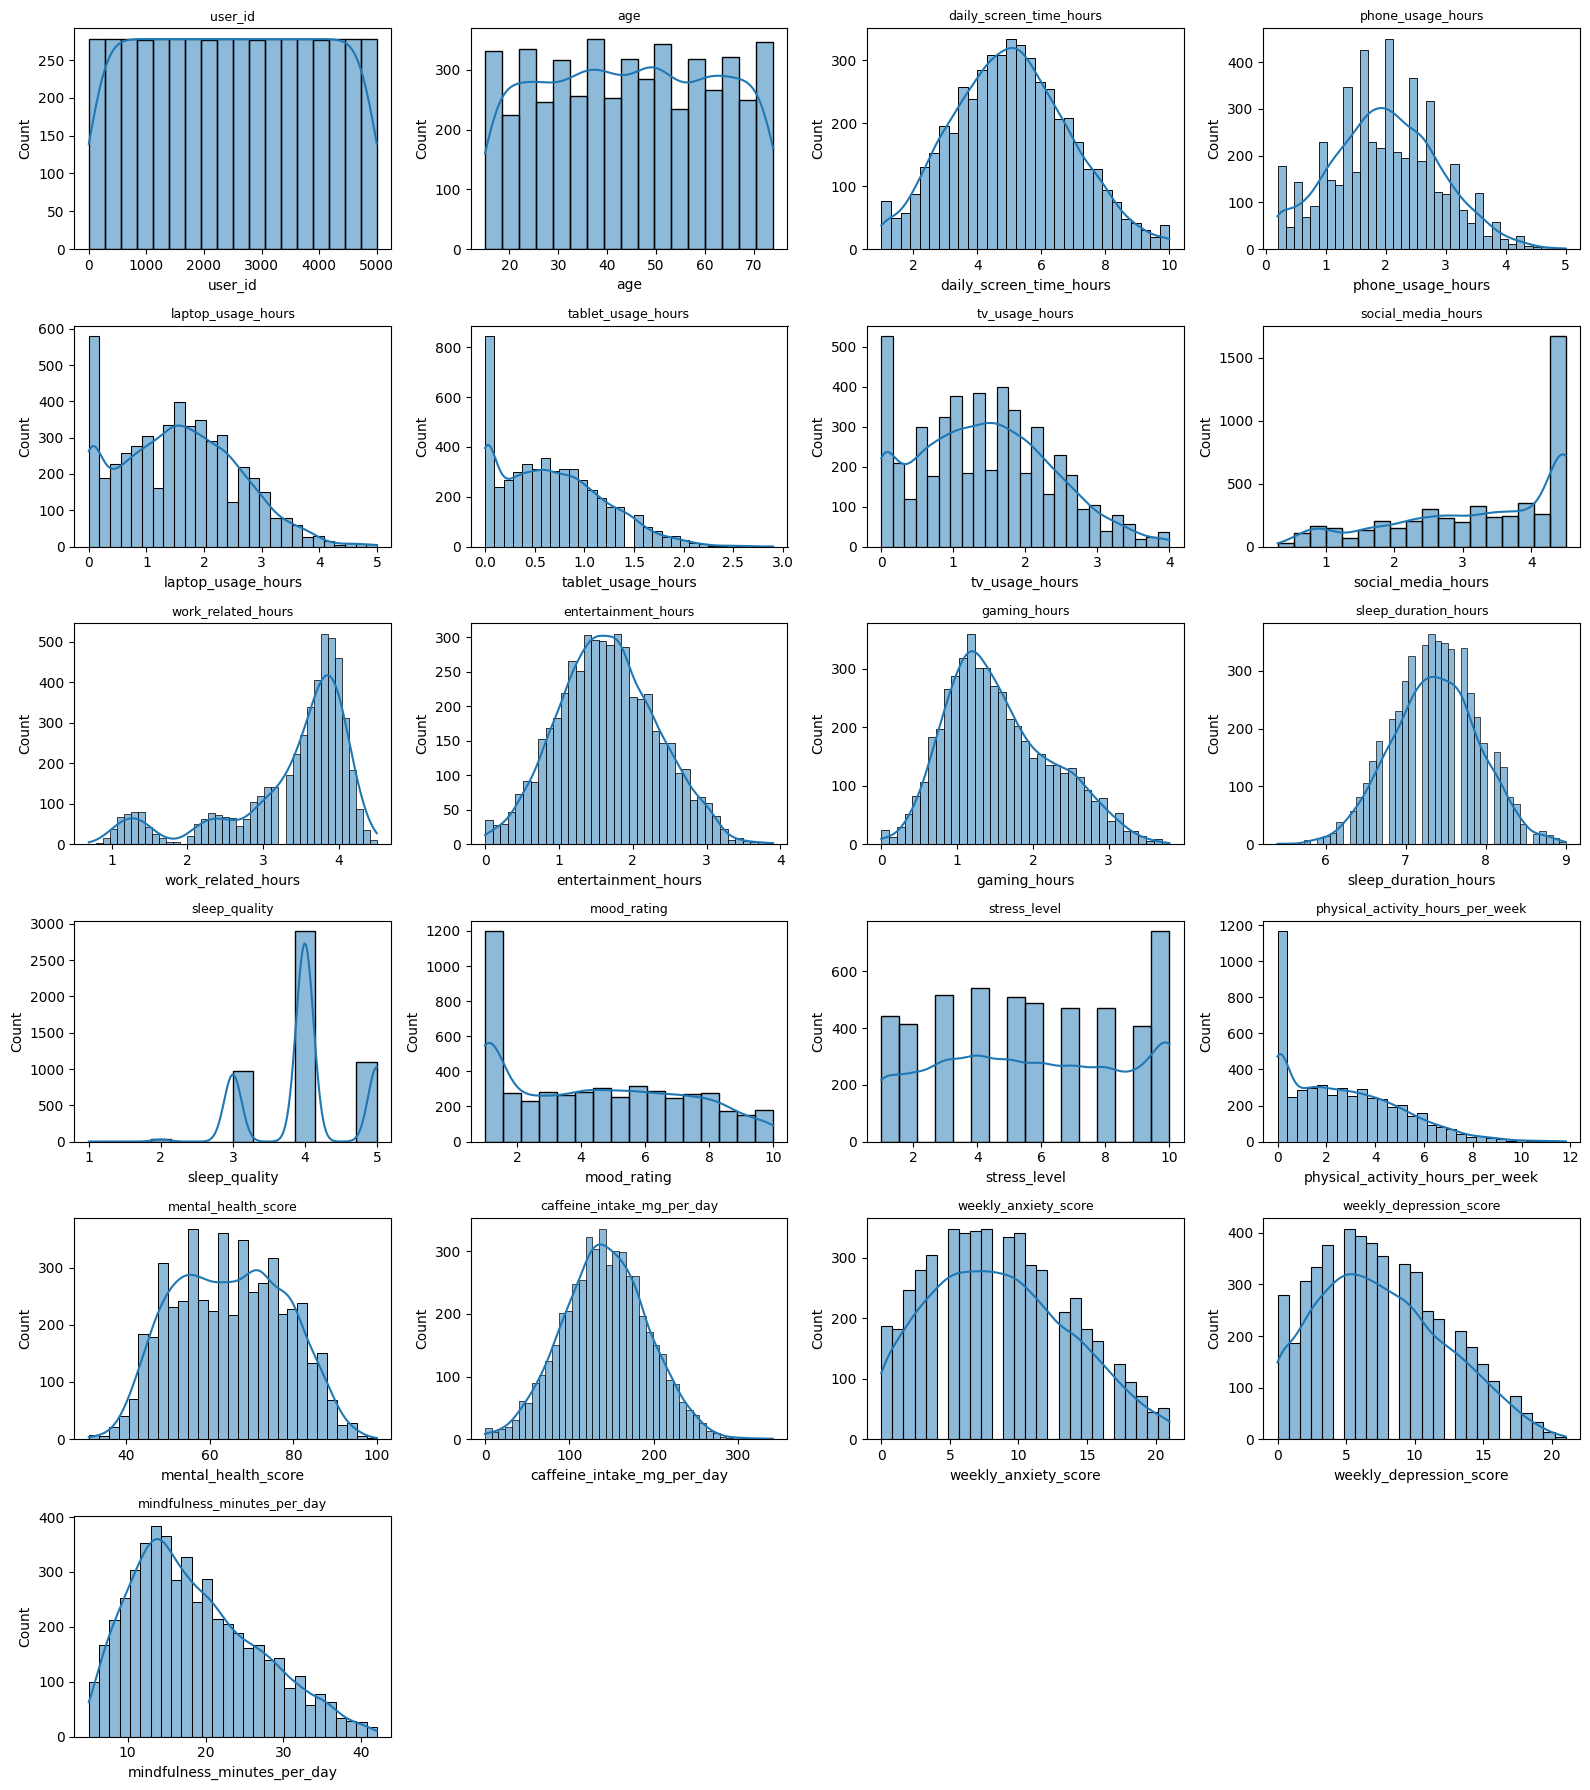

In [152]:
# Análisis de datos exploratorios

# Trazado de histograma corregido: configuración dinámica del tamaño de la cuadrícula

# Seleccion de columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_numeric = len(numeric_cols)
cols_per_row = 4
rows_needed = math.ceil(n_numeric / cols_per_row)

plt.figure(figsize=(cols_per_row*4, rows_needed*3))
for idx, col in enumerate(numeric_cols):
    plt.subplot(rows_needed, cols_per_row, idx+1)
    sns.histplot(df[col], kde=True)
    plt.title(col, fontsize=9)
    plt.tight_layout()
plt.show()

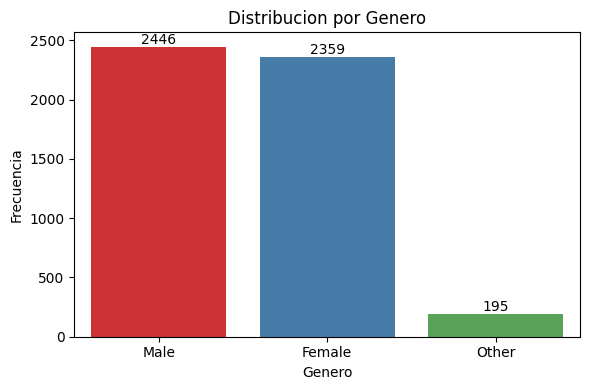

In [153]:
# Gráfico de recuento para la variable categórica 'género'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='gender', palette='Set1')
plt.title('Distribucion por Genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.tight_layout()

# Añadimos etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container)

plt.show()

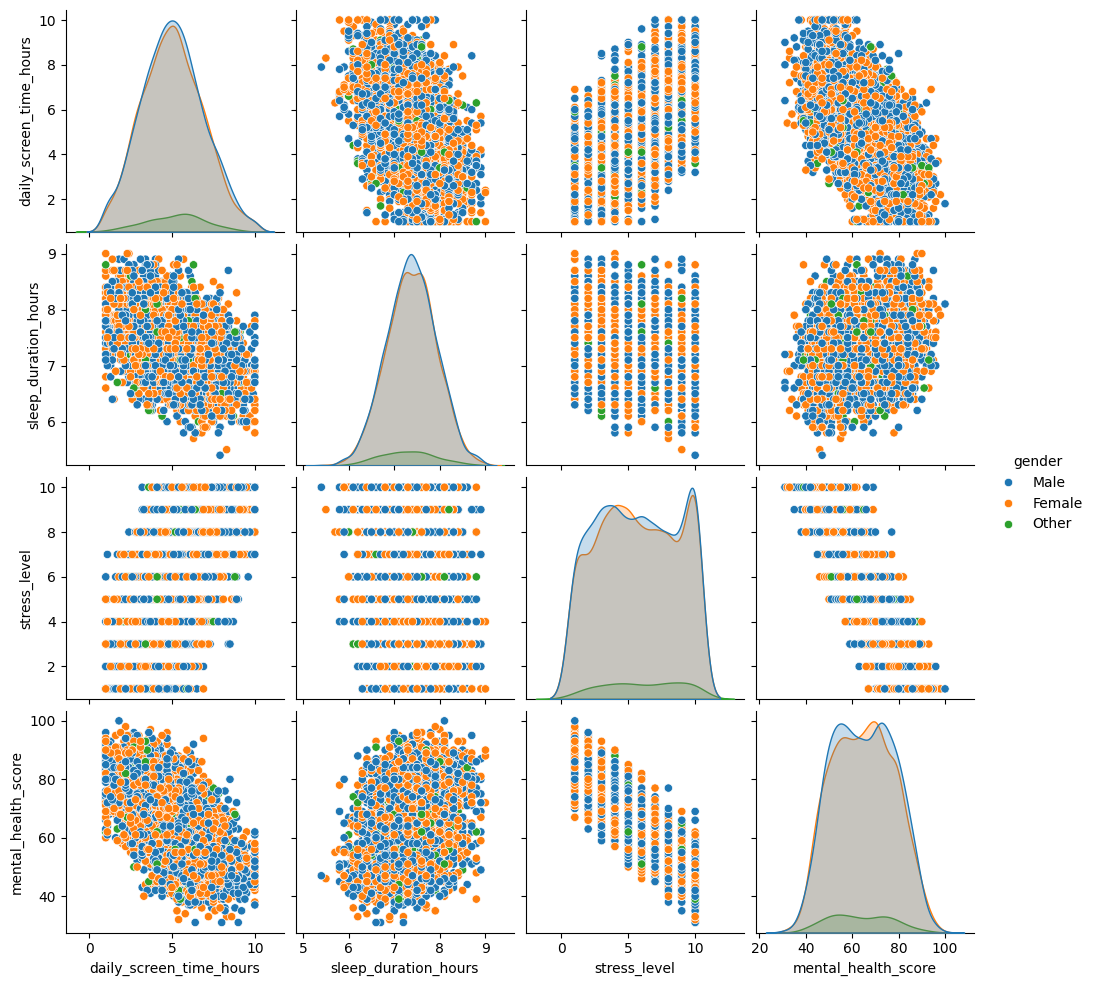

In [154]:
# Gráfico de pares para características numéricas seleccionadas segun el 'Genero'
selected_features = ['daily_screen_time_hours', 'sleep_duration_hours', 'stress_level', 'mental_health_score']
sns.pairplot(df, vars=selected_features, hue='gender')
plt.show()

# Modelos de Prediccion

In [155]:
# Comparacion de Modelos de Clasificacion

# Preparación de los datos para la clasificación
features = ['daily_screen_time_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'mental_health_score',
            'physical_activity_hours_per_week', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score']
X = df[features]
y = df['stress_level']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializar diferentes clasificadores
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, random_state=42), # Utilizando los mejores parámetros encontrados anteriormente
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}

# Diccionario para almacenar precisiones
accuracy_scores = {}

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"Entrenando {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"Accuracy para {name}: {accuracy:.4f}\n")

print('Los Modelos de Clasificaion fueron entrenados...')

Entrenando Random Forest...
Accuracy para Random Forest: 0.6140

Entrenando Logistic Regression...
Accuracy para Logistic Regression: 0.5940

Entrenando Decision Tree...
Accuracy para Decision Tree: 0.4510

Entrenando Support Vector Machine...
Accuracy para Support Vector Machine: 0.4400

Entrenando K-Nearest Neighbors...
Accuracy para K-Nearest Neighbors: 0.4270

Entrenando Neural Network...
Accuracy para Neural Network: 0.5590

Entrenando Gaussian Naive Bayes...
Accuracy para Gaussian Naive Bayes: 0.6000

Los Modelos de Clasificaion fueron entrenados...


In [156]:
# Muestra de los resultados obtenidos para cada Modelo de Clasificacion
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Modelo', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print("Comparacion de Resultados:\n")
display(accuracy_df)

Comparacion de Resultados:



,Modelo,Accuracy
0,Random Forest,0.614
6,Gaussian Naive Bayes,0.600
1,Logistic Regression,0.594
5,Neural Network,0.559
2,Decision Tree,0.451
3,Support Vector Machine,0.440
4,K-Nearest Neighbors,0.427


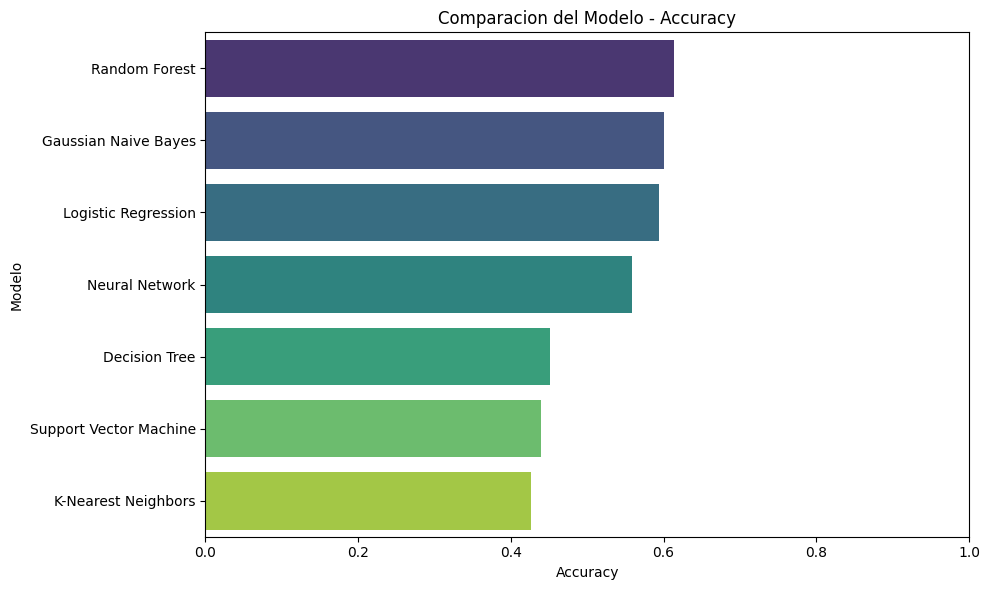

In [157]:
# Visualizacion de los Resultados obtenidos por Accuracy de cada Modelo
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Modelo', data=accuracy_df, palette='viridis')
plt.title('Comparacion del Modelo - Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
plt.xlim(0, 1) # Establezca el límite del eje x de 0 a 1 para mayor precisión
plt.tight_layout()
plt.show()

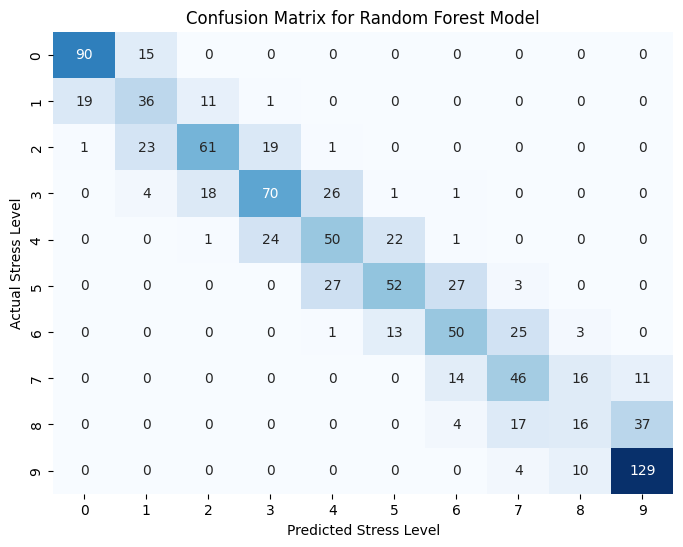

In [158]:
# Generar y visualizar la matriz de confusión para el modelo de RandomForest

# Podemos reutilizar el clasificador entrenado y los datos de prueba (X_test, y_test)

# clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, random_state=42)
# clf.fit(X_train, y_train) # X_train e y_train deberían estar disponibles en los pasos anteriores

# Predecir sobre el conjunto de prueba
y_pred_rf = clf.predict(X_test)

# Calcular la matriz de confusión
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Visualice la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.show()

## Conclusiones Finales y Posibles Mejoras

Basándonos en el análisis exploratorio de datos, la comparación de modelos de clasificación y la evaluación del modelo Random Forest, podemos extraer las siguientes conclusiones y proponer posibles mejoras:

**Conclusiones:**

*   Hemos identificado que el modelo Random Forest tuvo el mejor rendimiento en la predicción del nivel de estrés con una precisión de aproximadamente 0.614.
*   La matriz de confusión nos muestra que el modelo tiene un rendimiento variable para los diferentes niveles de estrés, con algunas clases siendo predichas con mayor precisión que otras. Es importante analizar esta matriz en detalle para entender qué niveles de estrés son más difíciles de clasificar correctamente.
*   La optimización de hiperparámetros proporcionó una ligera mejora en la precisión del modelo Random Forest.

**Posibles Mejoras y Próximos Pasos:**

*   **Análisis Profundo de la Matriz de Confusión:** Interpretar detalladamente la matriz de confusión para entender los errores de clasificación y las clases que se confunden con mayor frecuencia. Esto puede guiar futuras estrategias de mejora.
*   **Evaluación con Métricas Adicionales:** Calcular y analizar métricas como Precisión, Recall y F1-Score por clase. Esto es crucial para evaluar el rendimiento del modelo en cada nivel de estrés, especialmente si hay un desbalance en la distribución de las clases.
*   **Análisis de Importancia de Características:** Determinar qué características son las más influyentes en la predicción del estrés según el modelo Random Forest. Esto puede proporcionar información valiosa sobre los factores que más contribuyen al estrés.
*   **Manejo del Desbalance de Clases:** Si se identifica un desbalance significativo en la distribución de los niveles de estrés, aplicar técnicas como sobremuestreo (por ejemplo, SMOTE) o submuestreo para equilibrar las clases de entrenamiento y mejorar el rendimiento del modelo en las clases minoritarias.
*   **Exploración de Modelos Avanzados o Ensembles:** Considerar la aplicación de modelos más complejos o la combinación de varios modelos (ensembles) para intentar capturar patrones más sofisticados en los datos.
*   **Ingeniería de Características:** Crear nuevas características o transformar las existentes para mejorar la capacidad predictiva del modelo.
*   **Recopilación de Más Datos:** En muchos casos, un conjunto de datos más grande y diverso puede mejorar significativamente el rendimiento del modelo.
*   **Considerar un Enfoque Diferente:** Dado que el nivel de estrés es una variable ordinal, explorar modelos de regresión ordinal podría ser un enfoque alternativo interesante.

En resumen, si bien hemos logrado un modelo base para la predicción del estrés, hay un amplio margen para mejorar el rendimiento y la comprensión del modelo mediante un análisis más detallado y la aplicación de técnicas más avanzadas.